In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install koreanize_matplotlib
import koreanize_matplotlib
%matplotlib inline

In [49]:
df=pd.read_csv('NHIS_OPEN_GJ_2017_v1.1.csv',encoding="cp949")

## Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [50]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [51]:
df["연령대"] = df["연령대코드(5세단위)"].map(age_code)

In [52]:
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26,35~39세
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26,30~34세
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26,40~44세
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26,50~54세
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26,50~54세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,...,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26,45~49세
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,...,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26,35~39세
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26,40~44세
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26,25~29세


In [80]:
df.groupby("연령대")["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,22124.0,74.392908,11.496285,27.0,67.0,73.0,80.0,999.0
25~29세,64798.0,77.401255,16.459090,49.0,69.0,76.0,84.0,999.0
30~34세,78115.0,80.690592,21.759045,40.0,72.0,80.0,87.1,999.0
35~39세,85210.0,81.973645,14.326639,51.2,74.5,82.0,89.0,999.0
40~44세,131227.0,80.368061,10.358197,50.0,73.0,80.0,87.0,999.0
45~49세,118963.0,80.687879,9.398830,42.0,74.0,81.0,87.0,126.6
50~54세,129764.0,81.010692,8.954744,32.0,74.9,81.0,87.0,129.0
55~59세,111341.0,81.744612,8.623719,32.0,76.0,82.0,87.5,130.5
60~64세,105983.0,82.659791,8.522450,52.0,77.0,82.5,88.0,149.1


## Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

- 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.

In [54]:
df["음주여부"] = df["음주여부"].map({"Y":1,"N":0})

In [55]:
df1 = df[["음주여부","흡연상태","연령대코드(5세단위)","성별코드"]]

In [56]:
df1_corr = df1.corr()

In [57]:
df1_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.350928,-0.284924,-0.368333
흡연상태,0.350928,1.000000,-0.125710,-0.591158
연령대코드(5세단위),-0.284924,-0.125710,1.000000,0.081764
성별코드,-0.368333,-0.591158,0.081764,1.000000


<AxesSubplot: >

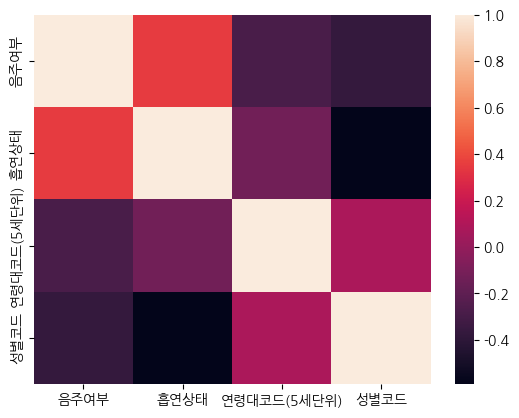

In [58]:
sns.heatmap(df1_corr)

In [59]:
mask=np.triu(np.ones_like(df1_corr,dtype=bool))

<AxesSubplot: >

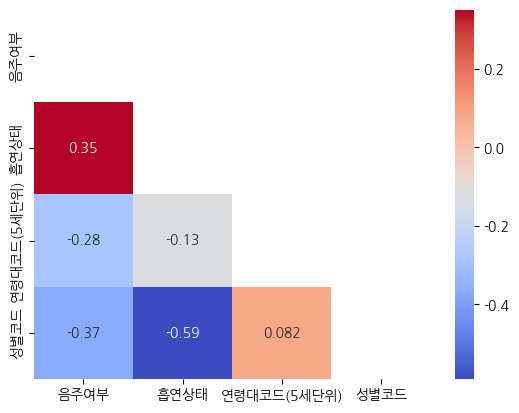

In [60]:
sns.heatmap(df1_corr,annot=True,fmt=".2",cmap="coolwarm",mask=mask)

## Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

- 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [61]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [62]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자', '연령대'],
      dtype='object')

In [63]:
df["흡연상태"] = df["흡연상태"].map(smoke)

In [64]:
df["음주여부"] = df["음주여부"].map(drink)

<AxesSubplot: xlabel='흡연상태', ylabel='count'>

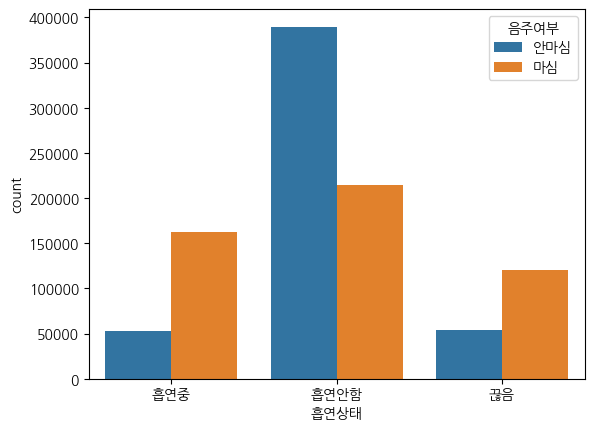

In [84]:
sns.countplot(df,x='흡연상태',hue="음주여부",order=["흡연중","흡연안함","끊음"],hue_order=['안마심','마심'])

## Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

-체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [66]:
df_120 = df[df["체중(5Kg단위)"]>=120]

In [76]:
df_120['체중(5Kg단위)'].value_counts()

120    239
125     81
130     43
135      5
140      3
Name: 체중(5Kg단위), dtype: int64

(80.0, 550.0)

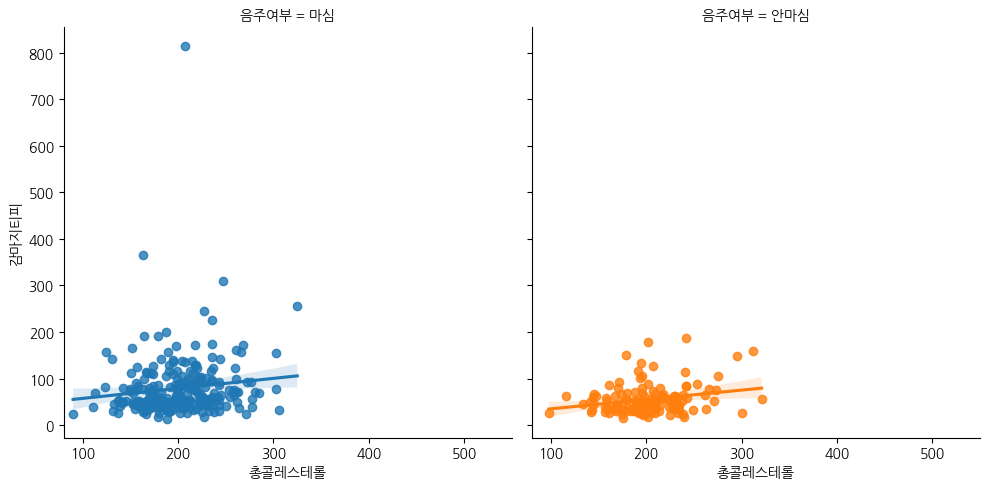

In [87]:
sns.lmplot(df_120,x="총콜레스테롤",y="감마지티피",hue="음주여부",col="음주여부")
plt.xlim(80,550)

## Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

In [73]:
df = df.drop(df[df['시력(좌)']==9.9].index)
df = df.drop(df[df['시력(우)']==9.9].index)

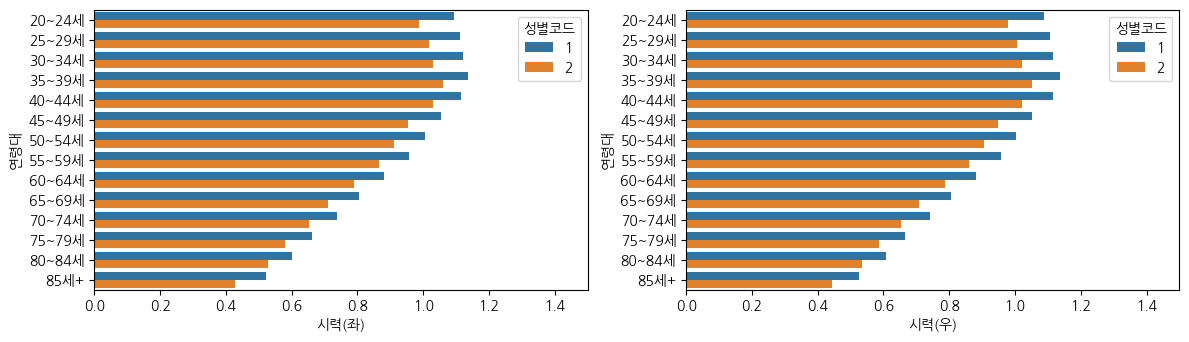

In [74]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.barplot(df,x="시력(좌)",y="연령대",hue='성별코드',errorbar=None,order=df["연령대"].value_counts().index.sort_values())
plt.xlim(0,1.5)
plt.subplot(2,2,2)
sns.barplot(df,x="시력(우)",y="연령대",hue='성별코드',errorbar=None,order=df["연령대"].value_counts().index.sort_values())
plt.xlim(0,1.5)
plt.show()